<a href="https://colab.research.google.com/github/blakeluther/RealEstate-EDA-PricePrediction/blob/main/BlakeLuther_CSC_233_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis & Price Prediction Model of New York City Property Sales

## My Objective

For this final project, I aim to achieve two objectives. The first, to find correlations between a properties features and their sale price. The second, to develop a Real Estate Sales Price Predictor using the correlations I found in the first part.

## Data Introduction

### Source

The sales information is from the Department of Finance of New York City.

[Department of Finance](https://www1.nyc.gov/site/finance/index.page)

### Explanation of Data Features

1.   **Borough**: A numerical code for the borough that the property is located in.

  *   Manhattan (1)
  *   Bronx (2)
  *   Brooklyn (3)
  *   Queens (4)
  *   Staten Island (5)


2.   **Neighborhood**: Department of Finance assessors determine the neighborhood name in the course of valuing
properties. The common name of the neighborhood is generally the same as the name
Finance designates. However, there may be slight differences in neighborhood boundary lines
and some sub-neighborhoods may not be included.

3.  **Building Class Category**: This is a field that we are including so that users of the Rolling Sales Files can easily
identify similar properties by broad usage (e.g. One Family Homes) without looking up
individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class
Category, Block and Lot.

4. **Tax Class at Present**:
Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4),
based on the use of the property.
  * Class 1: Includes most residential property of up to three units (such as one-,
two-, and three-family homes and small stores or offices with one or two
attached apartments), vacant land that is zoned for residential use, and most
condominiums that are not more than three stories.
  * Class 2: Includes all other property that is primarily residential, such as
cooperatives and condominiums.
  * Class 3: Includes property with equipment owned by a gas, telephone or electric
company.
  * Class 4: Includes all other properties not included in class 1,2, and 3, such as
offices, factories, warehouses, garage buildings, etc. 

5. **Block**: A Tax Block is a sub-division of the borough on which real properties are located.
The Department of Finance uses a Borough-Block-Lot classification to label all real
property in the City. “Whereas” addresses describe the street location of a property, the
block and lot distinguishes one unit of real property from another, such as the different
condominiums in a single building. Also, block and lots are not subject to name changes
based on which side of the parcel the building puts its entrance on.

6. **Lot**:
A Tax Lot is a subdivision of a Tax Block and represents the property unique location.

7. **Easement**:
An easement is a right, such as a right of way, which allows an entity to make limited use of
another’s real property. For example: MTA railroad tracks that run across a portion of another
property.

8. **Building Class at Present & Building Class at Time of Sale**:
The Building Classification is used to describe a property’s constructive use. The first position
of the Building Class is a letter that is used to describe a general class of properties (for
example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies
condominiums). The second position, a number, adds more specific information about the
property’s use or construction style (using our previous examples “A0” is a Cape Cod style
one family home, “O4” is a tower type office building and “R5” is a commercial condominium
unit). The term Building Class used by the Department of Finance is interchangeable with the
term Building Code used by the Department of Buildings.

9. **Address**: The street address of the property as listed on the Sales File. Coop sales
include the apartment number in the address field.

10. **Zip Code**: The property’s postal code

11. **Residential Units**:
The number of residential units at the listed property.

12. **Commercial Units**:
The number of commercial units at the listed property.

13. **Total Units**:
The total number of units at the listed property.

14. **Land Square Feet**:
The land area of the property listed in square feet.

15. **Gross Square Feet**:
The total area of all the floors of a building as measured from the exterior surfaces of the
outside walls of the building, including the land area and space within any building or structure
on the property. 

16. **Year Built**:
Year the structure on the property was built.

17. **Sales Price**:
Price paid for the property.

18. **Sale Date**:
Date the property sold.

Note: 
**0 Sales Price**:
A 0 sale indicates that there was a transfer of ownership without a cash consideration.
There can be a number of reasons for a $0 sale including transfers of ownership from
parents to children

[Source to Defitnitions](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf)

## Importing Libraries/ Modules


In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Processing Tools

# Regression Tools

## Importing Data

In [ ]:
path = '/content/drive/MyDrive/CSC-233/nyc-rolling-sales.csv'

In [ ]:
df = pd.read_csv(path)

## Initial Look at Data

Our initial DataFrame cotains 84,548 entries with 22 features.

In [ ]:
initialRows, initialColumns = df.shape

In [ ]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


The 'Unnamed: 0" column seems to serve no purpose. It acts as another index, but since there is already a correct index, it is safe to remove this column.

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

## Processing & Cleaning the Data

### Changing Data Types, if Needed

In its current state, the data in each column may not be represented correctly. That means that numbers may be represented as string/ object types while they should be int/ float data types. This section is dedicated to fixing these incorrect data types to their correct type.

In [ ]:
df.dtypes.transpose()

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

While I was converting these numbers, I notice a strange occurence with the pandas method of pd.to_numeric(). This method has a hard time dealing with ',' which messes up the actual numerical value as intended. So I made defined a method that converts the values in the column to a string and replaces ',' with nothing in order to keep the intended numerical value, and then add the changed values to a pandas Series.

Also, I made a method that converts a DataFrame column to numerical values.

These methods are defined below:

In [ ]:
def convertToIntWithC(col):
  l = list(df[col])
  l = [str(x).replace(',','') for x in l]
  l = pd.Series(l)
  return l

In [ ]:
def convertToNumeric(col):
  df[col] = pd.to_numeric(df[col],errors='coerce')

As seen in the above output, there are few columns that need their data type changed. For example, 'SALE PRICE', 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' are all object types, but they should be int64/ float64 data types. Additionally, the column 'SALE DATE' should be a datetime type as it represents a date. We will be addresssing these issues below.

In [ ]:
df['SALE PRICE'] = convertToIntWithC('SALE PRICE')
convertToNumeric('SALE PRICE')

In [ ]:
df['LAND SQUARE FEET'] = convertToIntWithC('LAND SQUARE FEET')
convertToNumeric('LAND SQUARE FEET')

In [ ]:
df['GROSS SQUARE FEET'] = convertToIntWithC('GROSS SQUARE FEET')
convertToNumeric('GROSS SQUARE FEET')

In [ ]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [ ]:
print("Column : Data Type")
print("----------------")
df.dtypes

Column : Data Type
----------------


BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

The columns are now the intended data types.

### Duplicated Entries

First thing, we are going to take a look at is if there are any duplicated entries in the data. I am going to use the built-in pandas functionality of .duplicated() to search the DataFrame for these entries

In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
duplicates

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,,A4,231 WEST 22ND STREET,,10011,1,0,1,1588.0,5653.0,1900,1,A4,10.0,2017-01-30
471,1,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,797,76,,D4,"166 WEST 22ND STREET, 4C",,10011,0,0,0,NaN,NaN,1950,2,D4,839000.0,2017-06-29
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,,R4,252 SEVENTH AVENUE,4K,10001,1,0,1,NaN,NaN,0,2,R4,1500000.0,2016-10-05
1436,1,CIVIC CENTER,46 CONDO STORE BUILDINGS,4,175,1301,,RK,90 FRANKLIN STREET,B,10013,0,0,1,NaN,NaN,0,4,RK,NaN,2017-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84209,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,,A2,586 WOOLLEY AVENUE,,10314,1,0,1,5000.0,1080.0,1955,1,A2,NaN,2017-02-07
84292,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,,B9,492 INGRAM AVENUE,,10314,2,0,2,2200.0,1440.0,1970,1,B9,NaN,2016-09-08
84319,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,,B2,267 CRAFTON AVENUE,,10314,2,0,2,4320.0,2288.0,1970,1,B2,NaN,2017-01-10
84346,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,,B2,180 WALCOTT AVENUE,,10314,2,0,2,4100.0,2010.0,1975,1,B2,NaN,2017-07-03


In total, we have 765 duplicated entries. We can infer that either these were inputted twice or these could have been different apartments in the same building. But, to reduce confusion I will only keep the last entry in the DataFrame and drop the other duplicated entries for each.

In [ ]:
df = df.drop_duplicates(keep='last')

In [ ]:
r, c = df.shape
percentLeft = (r/initialRows) * 100
print("We are now using {:.2f}% of the original data.".format(percentLeft))

We are now using 99.10% of the original data.


### Checking for Null/ NaN entries

In this section, we are going to look for empty/ Null/ NaN entries in the columns of the DataFrame.

In [ ]:
print("Column : Number of Null entries")
df.isnull().sum()

Column : Number of Null entries


BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

According to the df.isnull().sum() output, the only columns that have null entries are 'LAND SQUARE FEET', 'GROSS SQUARE FEET', and 'SALE PRICE'. However, I know there are columns that have empty values such as the 'EASE-MENT' column as seen in the df.head() output above. Due to this, I am going to drop the 'EASE-MENT' column.

In [ ]:
df = df.drop('EASE-MENT',axis=1)

Due to fact that I want to make a price prediction model, I am going to drop those entries that have a null entry in the 'SALE PRICE' column.

In [ ]:
#toDrop = ['EASE-MENT', "APARTMENT NUMBER", "ADDRESS"]
#df = df.drop(toDrop, axis=1)

In [ ]:
df = df[df['SALE PRICE'].notnull()]

In [ ]:
numNull = df['SALE PRICE'].isnull().sum()

In [ ]:
print("There are now {} null entries in the SALE PRICE column.".format(numNull))

There are now 0 null entries in the SALE PRICE column.


We have narrowed our data down to those only with a specified Sale Price to help our predictive model in the end.

In [ ]:
r, c = df.shape
percentLeft = (r/initialRows) * 100
print("We are now using {:.2f}% of the original data.".format(percentLeft))

We are now using 82.33% of the original data.


### Checking for Irregularities

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,69607.0,2.922996e+00,1.236549e+00,1.0,2.0,3.0,4.0,5.000000e+00
BLOCK,69607.0,4.199890e+03,3.431898e+03,1.0,1350.0,3378.0,6192.0,1.631900e+04
LOT,69607.0,3.745805e+02,6.562320e+02,1.0,22.0,50.0,820.0,9.106000e+03
ZIP CODE,69607.0,1.074116e+04,1.264805e+03,0.0,10306.0,11209.0,11249.0,1.169400e+04
RESIDENTIAL UNITS,69607.0,1.875070e+00,1.429140e+01,0.0,0.0,1.0,2.0,1.844000e+03
COMMERCIAL UNITS,69607.0,1.641214e-01,8.997236e+00,0.0,0.0,0.0,0.0,2.261000e+03
TOTAL UNITS,69607.0,2.059319e+00,1.699272e+01,0.0,0.0,1.0,2.0,2.261000e+03
LAND SQUARE FEET,48449.0,3.544802e+03,3.973875e+04,0.0,1425.0,2150.0,3100.0,4.252327e+06
GROSS SQUARE FEET,47900.0,3.528707e+03,2.920564e+04,0.0,816.0,1620.0,2508.0,3.750565e+06
YEAR BUILT,69607.0,1.799852e+03,5.200993e+02,0.0,1920.0,1938.0,1965.0,2.017000e+03


Inside of the numerical data of the DataFrame, we can see a few problems with the numerical data.

The columns 'GROSS SQUARE FEET', 'LAND SQUARE FEET', and 'YEAR BUILT' and 'SALE PRICE' all contain at their minimum, a value of zero. Considering our intended Price Prediction Model, it is safe to say, we should eliminate the rows that contain a zero for their Sale Price and others.

In [ ]:
df = df[df['SALE PRICE'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]

I decided not to remove the properties with zeroes in their "LAND SQUARE FEET" and "YEAR BUILT" because I am dropping "LAND SQUARE FEET" column in the next section due to correlation, and I can adjust the "YEAR BUILT" zeroes in another section.

In [ ]:
r,c = df.shape
percentLeft = (r/initialRows) * 100
print("We are now using {:.2f}% of the original data.".format(percentLeft))

We are now using 60.23% of the original data.


### Correlation Matrix to Narrow our Data

This section is used to narrow our features down since highly correlated features generally do not help predictive models.

In [ ]:
numbers = df.select_dtypes(include=['float64','int64'])

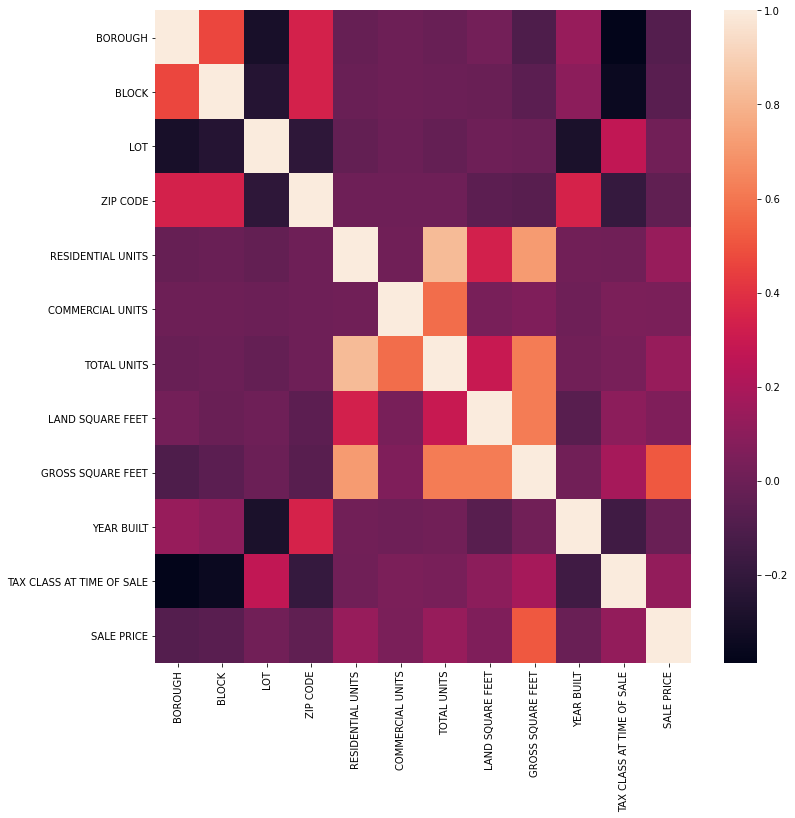

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(numbers.corr())

For Regression models, it is generally acceppted to exclude higly correlated features because these attributes can impact the performance of the model which is called "Multicollinearity". This can lead to skewed or misleading results. A suggested way to deal with this problem is to remove one of the two highly correlated features.


In our correlation matrix, we can see that 'RESIDENTIAL UNITS' and 'TOTAL UNITS' are very correlated along with 'GROSS SQUARE FEET' and 'LAND SQUARE FEET'.

Thus, we remove "RESIDENTIAL UNITS" and "LAND SQUARE FEET."

In [ ]:
toDrop = ['TOTAL UNITS', 'LAND SQUARE FEET']
df = df.drop(toDrop, axis=1)

### Looking for Outliers in Sale Price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale Price of Properties')

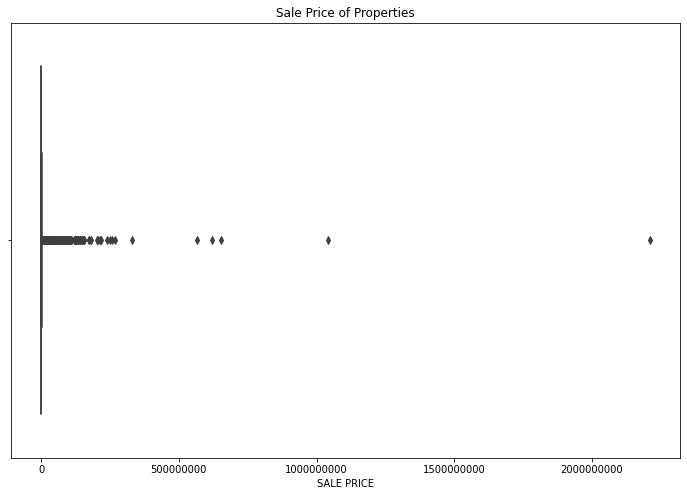

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df['SALE PRICE'])
plt.ticklabel_format(style='plain',axis='x')
plt.title("Sale Price of Properties")

In [ ]:
priceSkew = df['SALE PRICE'].skew()
print("The skew of the data in the column 'SALE PRICE' is {:.2f}".format(priceSkew))

The skew of the data in the column 'SALE PRICE' is 109.05


From looking at the boxplot and the skew of the column 'SALE PRICE', there is a massive range of values in this dataset. We need to narrow this data down to a managable level of symmetry, if we want to create a good predictive model.

First, I am going to manually narrow the data down using criteria that will only allow entries from a certain price range.

In [ ]:
df = df[df['SALE PRICE'] > 100000]
df = df[df['SALE PRICE'] < 5000000]

In [ ]:
priceSkew = df['SALE PRICE'].skew()
print("The skew of the data in the column 'SALE PRICE' is {:.2f}".format(priceSkew))

The skew of the data in the column 'SALE PRICE' is 2.34


After narrowing our price range, we now have a skew of 2,34, a much better result than the result, previously, of 109.05. Although, it is still positively skewed, it is not as bad as before.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sale Price of Properties')

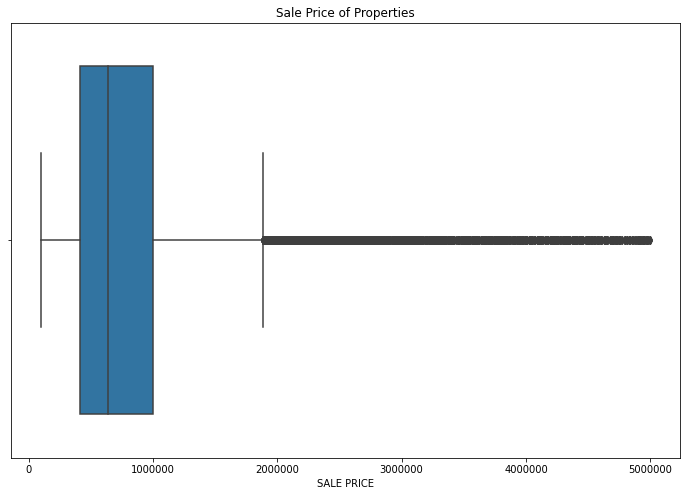

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df['SALE PRICE'])
plt.ticklabel_format(style='plain',axis='x')
plt.title("Sale Price of Properties")

In [ ]:
r,c = df.shape
percentLeft = (r/initialRows) * 100
print("We are now using {:.2f}% of the original data.".format(percentLeft))

We are now using 55.14% of the original data.


At this point, we are using just below 60% of the original data size. But, we have narrowed our data to a more manageable range of sale prices.

## Taking a Look at the Features of the Data

In this section, we are going to take a look at the features of the DataFrame, and look at the correlations between these features and their sale prices. We may need to adjust/ narrow the scope of the range of these features, if there is a huge range between them.

### Borough

Text(0.5, 1.0, 'Overall Sum of Properties sold and The Average Property Price')

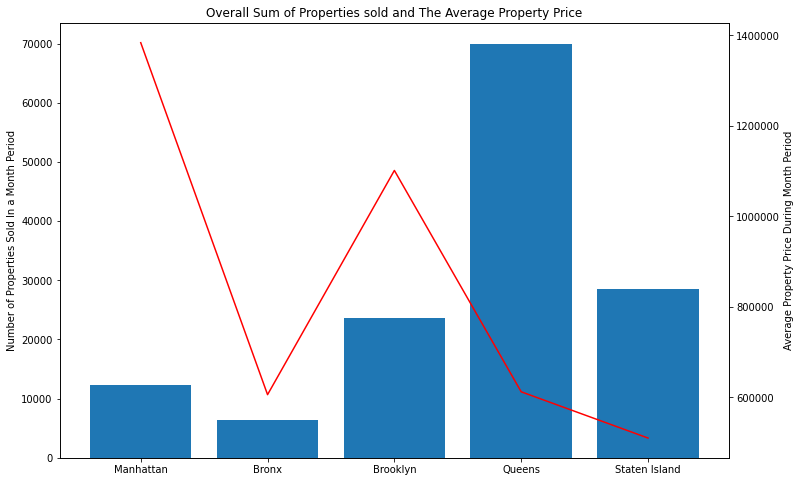

In [ ]:
prices = df.groupby('BOROUGH')['SALE PRICE'].mean()
counts = df.groupby('BOROUGH')['BOROUGH'].sum()
labels = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

plt.figure(figsize=(12,8))
plt.bar(labels,counts.values)
plt.ylabel('Number of Properties Sold In a Month Period')

axes2 = plt.twinx()
axes2.plot(labels, prices.values,color='r')
axes2.set_ylabel("Average Property Price During Month Period")

plt.ticklabel_format(style='plain',axis='y')
plt.title("Overall Sum of Properties sold and The Average Property Price")

This chart shows the cumulative number of properties sold in each borough on the left axis, with the average property price per borough on the right axis. Overall, there is a slight correlation between a property's price and its location, however, some do not agree with this. In general, the higher the average price of the borough, the lower number of properties sold in the borough. The boroughs that follow this are Manhattan, Queens, and Staten Island. Manhattan is the most expensive and one of the least bought areas, while Queens and Staten Island are some of the most bought areas with the lowest average price. Brooklyn slightly supports this, as it is highly bought but it is quite expensive. However, the Bronx does not follow this correlation as it is very cheap (similar average price to the Queens) but the area is not very bought in. Overall, we can use this data to help our predictive model.

### Neighborhood

In [ ]:
neighborhoods = len(df['NEIGHBORHOOD'].unique())
print("The number of unique neighborhoods that these properties were sold in is {}.".format(neighborhoods))

The number of unique neighborhoods that these properties were sold in is 251.


In [ ]:
counts = df['NEIGHBORHOOD'].value_counts()[:10]
avgPrice = df.groupby(['NEIGHBORHOOD']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['NEIGHBORHOOD'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Neighborhood vs Cumulative Count and Average Price for the 10 Most Common Neighborhood')

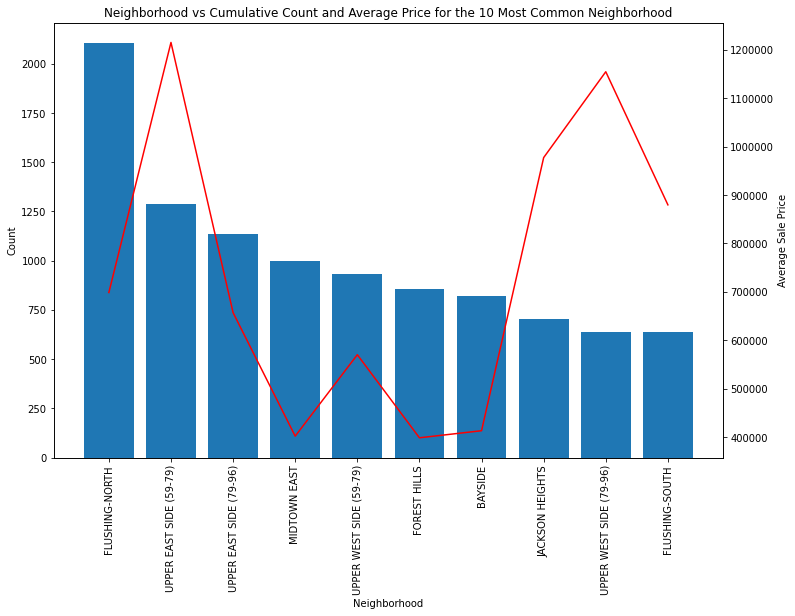

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.title("Neighborhood vs Cumulative Count and Average Price for the 10 Most Common Neighborhood")

Although there is significant difference between the average sale price between neighborhoods in New York City, I don't think it is feasible to create 250 dummies in order to use this information.

In [ ]:
df = df.drop('NEIGHBORHOOD', axis=1)

### Building Class Category

There are multiple columns that reference the properties building class category; 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'.

Although there are three types of these categories, I don't believe these separate categories will help in our regression model, as I think these class categories will stay the same throughout this time. Therefore, I will be dropped the 'At Present' and the 'at time of Sale' columns.

In [ ]:
df = df.drop(labels=['BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE'], axis=1)

In [ ]:
bccs = len(df['BUILDING CLASS CATEGORY'].unique())
print("The number of unique building class categories for these properties is {}.".format(bccs))

The number of unique building class categories for these properties is 40.


[Text(0, 0, '01 ONE FAMILY DWELLINGS                    '),
 Text(0, 0, '02 TWO FAMILY DWELLINGS                    '),
 Text(0, 0, '10 COOPS - ELEVATOR APARTMENTS             '),
 Text(0, 0, '13 CONDOS - ELEVATOR APARTMENTS            '),
 Text(0, 0, '03 THREE FAMILY DWELLINGS                  '),
 Text(0, 0, '09 COOPS - WALKUP APARTMENTS               '),
 Text(0, 0, '07 RENTALS - WALKUP APARTMENTS             '),
 Text(0, 0, '17 CONDO COOPS                             '),
 Text(0, 0, '04 TAX CLASS 1 CONDOS                      '),
 Text(0, 0, '22 STORE BUILDINGS                         '),
 Text(0, 0, '14 RENTALS - 4-10 UNIT                     '),
 Text(0, 0, '12 CONDOS - WALKUP APARTMENTS              '),
 Text(0, 0, '15 CONDOS - 2-10 UNIT RESIDENTIAL          '),
 Text(0, 0, '05 TAX CLASS 1 VACANT LAND                 '),
 Text(0, 0, '43 CONDO OFFICE BUILDINGS                  '),
 Text(0, 0, '29 COMMERCIAL GARAGES                      '),
 Text(0, 0, '21 OFFICE BUILDINGS        

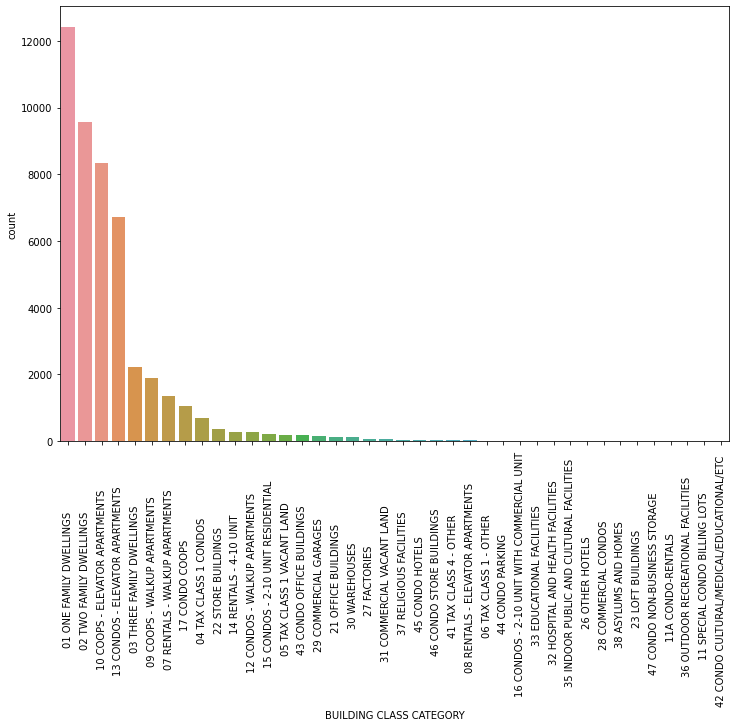

In [ ]:
plt.figure(figsize=(12,8))
p = sns.countplot(x=df['BUILDING CLASS CATEGORY'],
              order=df['BUILDING CLASS CATEGORY'].value_counts().index)

p.set_xticklabels(p.get_xticklabels(), rotation=90)

There are 40 distinct building class categories for these properties. That is a few too many variables to account for, so to narrow the column downwards, I will apply a category condenser function to the column that will take a set number of the largest unique values of the column, and add the rest to a final category. 

In [ ]:
def createCategories(col, num_cats=10):
  if len(col.value_counts().keys()) < num_cats:
    num_cats = len(col.value_counts().keys())
  categories = pd.DataFrame(col.value_counts().nlargest(num_cats-1))
  categories['row+num'] = [str(x+1) for x in range(len(categories))]
  categories['name'] = categories.index.values
  col = pd.DataFrame({'val':col.values})
  col = pd.merge(col, categories, how='left', left_on='val', right_on='name')
  col['new'] = col['row+num'].fillna(str(num_cats))
  return col['new'].values

In [ ]:
df['building_category'] = createCategories(df['BUILDING CLASS CATEGORY'])

In [ ]:
df['building_category'] = pd.to_numeric(df['building_category'])

In [ ]:
avgPrice = df.groupby(['building_category']).mean()['SALE PRICE']

In [ ]:
x_labels = list(df['BUILDING CLASS CATEGORY'].value_counts().index[:9])
x_labels = [str(x).rstrip() for x in x_labels]
x_labels.append("The Rest")

Text(0.5, 0, 'Building Class Category')

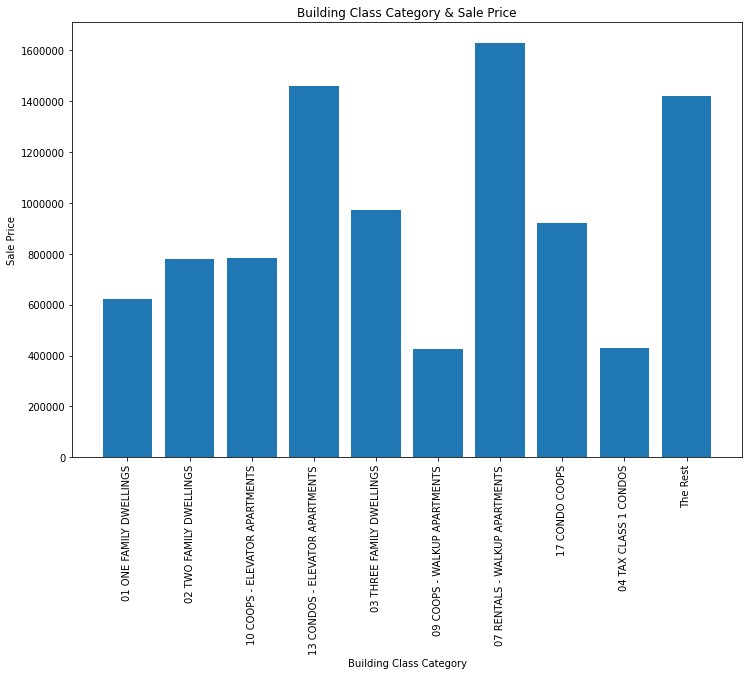

In [ ]:
plt.figure(figsize=(12,8))

plt.bar(x_labels, avgPrice)
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Building Class Category & Sale Price")
plt.ylabel("Sale Price")
plt.xlabel("Building Class Category")

Each building class category has a distinct sale price. That means we can use a property's building class category to help predict its sale price.

#### Make Dummies for Later

I want to include this information in my price prediction model, but in a regression analysis, they have to be of numerical value. By creating dummy variables, it allows me to convert string data and categorical data into numerical values.

In [ ]:
bcs_dummies = pd.get_dummies(df['building_category'], prefix='bc')
df = pd.concat([df, bcs_dummies], axis=1)


In [ ]:
df = df.drop(['BUILDING CLASS CATEGORY', 'building_category'], axis=1)

### Tax Class

In [ ]:
df['tax_class'] = createCategories(df['TAX CLASS AT PRESENT'])

In [ ]:
df['tax_class'] = pd.to_numeric(df['tax_class'])
avgPrice = df.groupby(['tax_class']).mean()['SALE PRICE']

In [ ]:
x_labels = list(df['TAX CLASS AT PRESENT'].value_counts().index)
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 0, 'Tax Class')

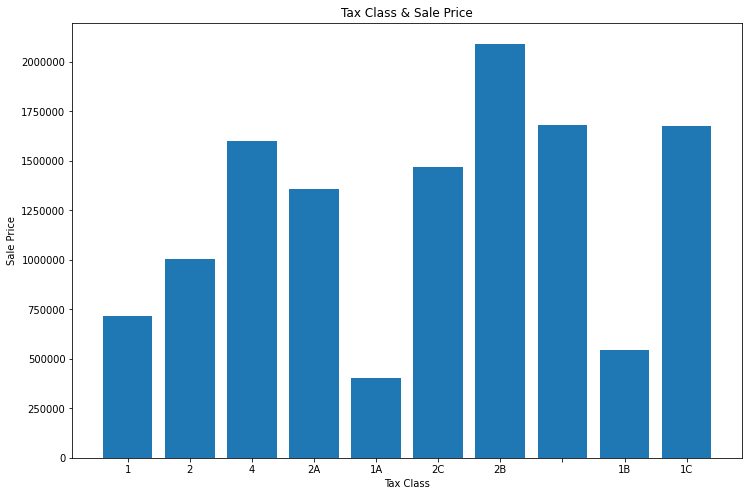

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, avgPrice)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Tax Class & Sale Price")
plt.ylabel("Sale Price")
plt.xlabel("Tax Class")

#### Making Dummies For Later



In [ ]:
tax_class = pd.get_dummies(df['tax_class'], prefix='tc',drop_first=True)
df = pd.concat([df, tax_class], axis=1)
df = df.drop('TAX CLASS AT PRESENT', axis=1)

Since I am using the 'At Present' part of the Tax class category, I am going to drop the 'TAX CLASS AT TIME OF SALE' to reduce redundency.

In [ ]:
df = df.drop(labels=['TAX CLASS AT TIME OF SALE', 'tax_class'],axis=1)

### Block

We are going to see if there is a correlation between a properties block value, and its sale price.

In [ ]:
uniques = len(df['BLOCK'])
print("Number of Unique Block Identifiers: {}".format(uniques))

Number of Unique Block Identifiers: 46619


In [ ]:
counts = df['BLOCK'].value_counts()[:10]
avgPrice = df.groupby(['BLOCK']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['BLOCK'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Block vs Cumulative Count and Average Price for the 10 Most Common Blocks')

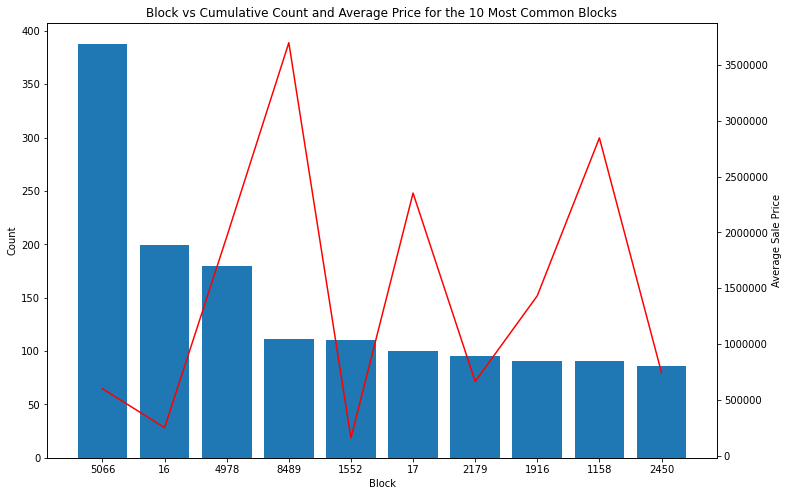

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("Block")

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.title("Block vs Cumulative Count and Average Price for the 10 Most Common Blocks")

Due to the shear number of unique identifiers in regards to properties' block value, I couldn't graph every block number, so instead I included the first 10 most common block values for the properties along with their average sale price. As we can see, there seems to a correlation between a properties sale price and their block value as each average sale price is different than others which can help us predict a sale price.

### Lot

In [ ]:
uniques = len(df['LOT'])
print("Number of Unique LOT Identifiers: {}".format(uniques))

Number of Unique LOT Identifiers: 46619


In [ ]:
counts = df['LOT'].value_counts()[:10]
avgPrice = df.groupby(['LOT']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['LOT'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Lot vs Cumulative Count and Average Price for the 10 Most Common Lots')

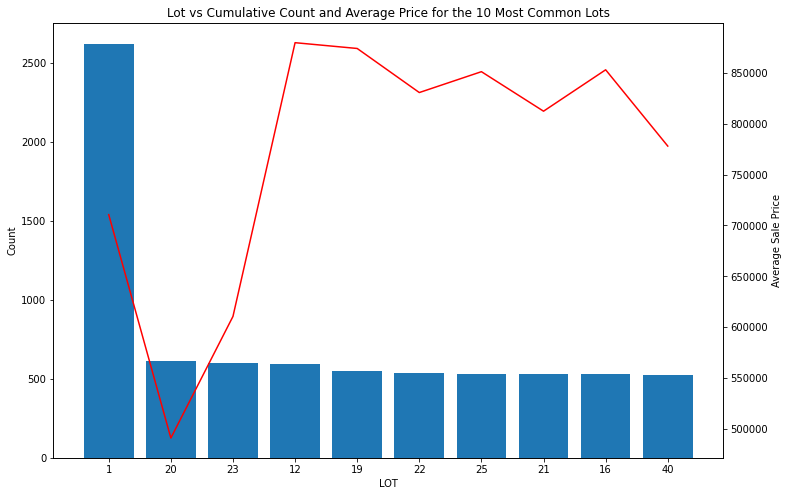

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("LOT")

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.title("Lot vs Cumulative Count and Average Price for the 10 Most Common Lots")

Just as the 'Block' category, there are too many distinct Lot values to be able to plot them all, so we plotted the first 10 most frequent blocks along with their cumulative counts and average sale price. And we can notice that each Lot value has a different average price which can help us predict a property's sale price. Although, there is not a particular trend to this data, but we can use it narrow our data to a certain price.

### Zip Code

In [ ]:
counts = df['ZIP CODE'].value_counts()[:10]
avgPrice = df.groupby(['ZIP CODE']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['ZIP CODE'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Zip Code vs Cumulative Count and Average Price for the 10 Most Common Zip Codes')

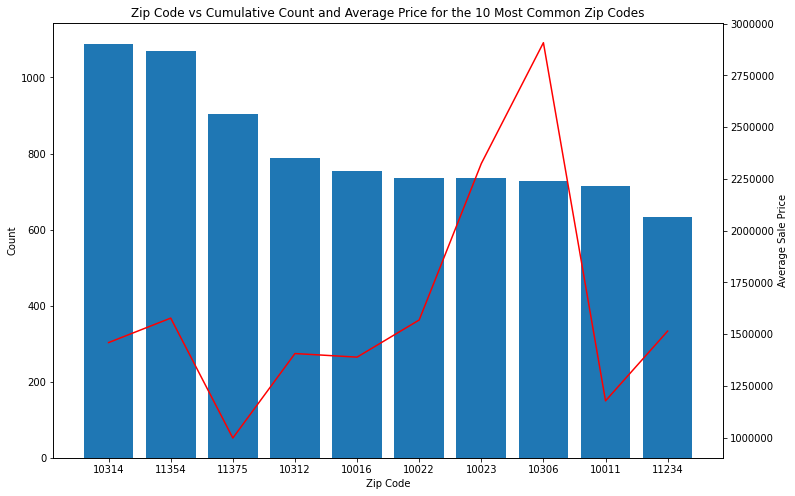

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("Zip Code")

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.title("Zip Code vs Cumulative Count and Average Price for the 10 Most Common Zip Codes")

We can use this zip code data to help predict our property prices as each zip code area are of different prices, with clear distinctions between two zip codes, at least from the top 10 most common zip codes. Thus, I will include this zip code data in our price prediction model.

### Commercial Units

In [ ]:
counts = df['COMMERCIAL UNITS'].value_counts()[:10]
avgPrice = df.groupby(['COMMERCIAL UNITS']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['COMMERCIAL UNITS'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Commercial Units vs Cumulative Count and Average Price for the 10 Most Common Blocks')

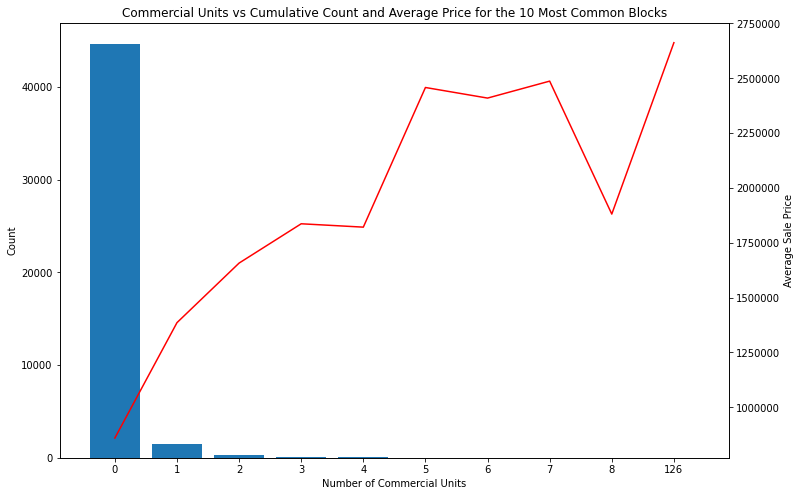

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("Number of Commercial Units")

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.title("Commercial Units vs Cumulative Count and Average Price for the 10 Most Common Blocks")

Looking at the graph, we can see that as the number of commercial units a property has, the higher average price that the property will have. This trend is quite clear in this graph.

### Total Units 

In [ ]:
counts = df['RESIDENTIAL UNITS'].value_counts()[:10]
avgPrice = df.groupby(['RESIDENTIAL UNITS']).mean()['SALE PRICE'][:10]

In [ ]:
x_labels = list(df['RESIDENTIAL UNITS'].value_counts().index[:10])
x_labels = [str(x).rstrip() for x in x_labels]

Text(0.5, 1.0, 'Residential Units vs Cumulative Count and Average Price for the 10 Most Common Blocks')

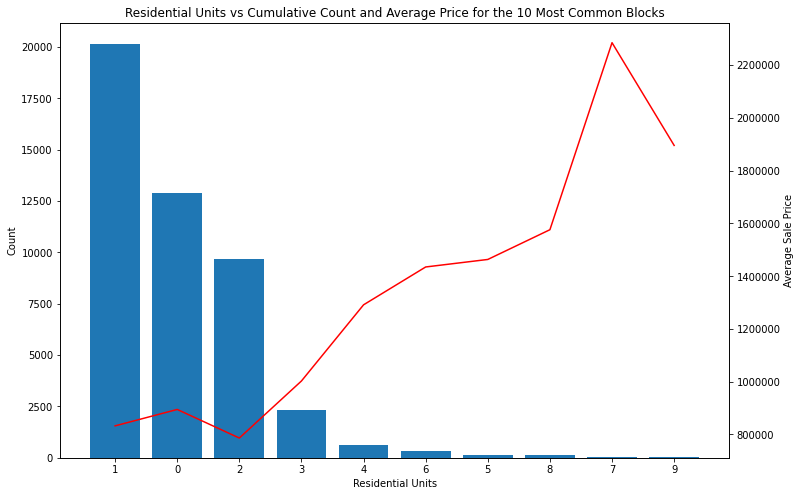

In [ ]:
plt.figure(figsize=(12,8))
plt.bar(x_labels, counts)
plt.ylabel("Count")
plt.xlabel("Residential Units")

axes2 = plt.twinx()
axes2.plot(x_labels, avgPrice,color='r')
plt.ylabel("Average Sale Price")
plt.ticklabel_format(style='plain',axis='y')

plt.xlabel("Residential Units")
plt.title("Residential Units vs Cumulative Count and Average Price for the 10 Most Common Blocks")

### Gross Square Feet

In [ ]:
median = df['GROSS SQUARE FEET'][df['GROSS SQUARE FEET'] != 0].median()
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(median)
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].apply(lambda x: x if x > 0 else median)
df['GROSS SQUARE FEET'] = np.log(df['GROSS SQUARE FEET'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


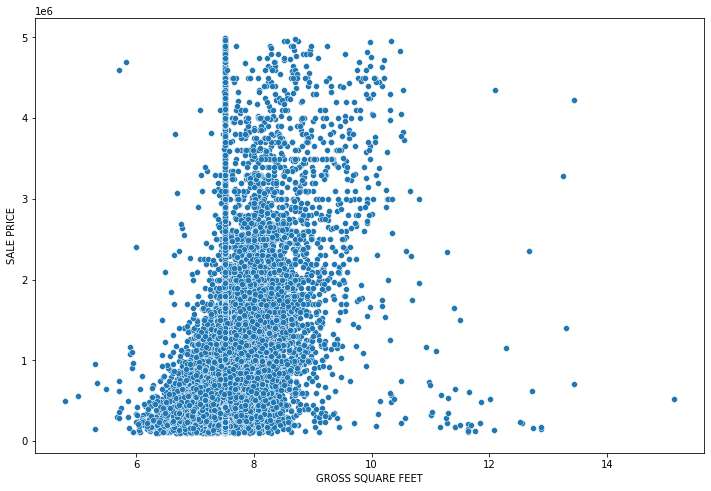

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['GROSS SQUARE FEET'], df['SALE PRICE'])

Looking at the outputted graph of the logged gross square feet and its corresponding price, there somewhat of a trend in increasing gross square feet of property and increasing price. However, there is such a big range in the sale prices of every gross square feet, that is hard to come to this conclusion





### YEAR BUILT

Earlier, we noted that the 'YEAR BUILT' column has values that equal zero. A quick way to fix this is to assign all those properties with a zero to the median year-built based on the properties that have a year-built.

In [ ]:
median = df['YEAR BUILT'][df['YEAR BUILT'] != 0].median()
df['YEAR BUILT'] = df['YEAR BUILT'].apply(lambda x: x if x > 1750 else median)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


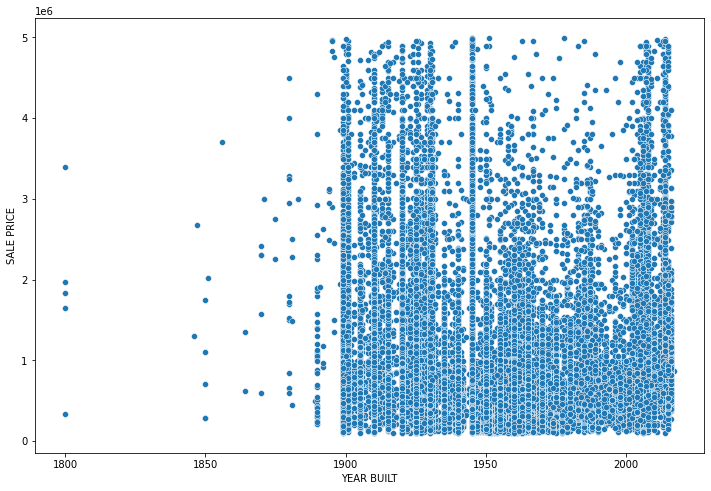

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['YEAR BUILT'],df['SALE PRICE'])

Looking at this scatter plot, we can probably use this data to help predict the price, however, I'm not sure to the extent of that usefulness. Each year has a huge range of sale prices and because of this range, just having a Year feature may not particurly help in predicting our price. However, we will see in our regression.

## Regression - Price Model

### Skew

To further reduce the skew of the data, we can apply a log function across the sale prices to reduce, a common way to reduce skew in one's data.

[Handle Skew](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)

In [ ]:
print("Feature : Skew")
print("--------------")
df.skew()

Feature : Skew
--------------


BOROUGH               -0.343472
BLOCK                  1.047382
LOT                    4.280502
ZIP CODE              -6.924575
RESIDENTIAL UNITS    148.507745
COMMERCIAL UNITS     213.333673
GROSS SQUARE FEET      2.587442
YEAR BUILT             0.526074
SALE PRICE             2.344738
bc_1                   1.057649
bc_2                   1.459876
bc_3                   1.674145
bc_4                   2.028318
bc_5                   4.229837
bc_6                   4.639907
bc_7                   5.615951
bc_8                   6.416588
bc_9                   8.012090
bc_10                  4.123360
tc_2                   0.470297
tc_3                   5.706472
tc_4                   6.080772
tc_5                   8.104155
tc_6                   9.640559
tc_7                  12.241953
tc_8                  13.742821
tc_9                  15.527336
tc_10                 55.723725
dtype: float64

As of right now, there is a high degree of asymmetry in our data. We are going to take the log of each column if its skew is over 1, only if it is a numerical value.

In [ ]:
cols = list(df.select_dtypes(exclude=['object', 'datetime']))

In [ ]:
for col in cols:
  if df[col].skew() > 1:
    df[col] = np.log1p(df[col])

In [ ]:
print("Feature : Skew")
print("--------------")
df.skew()

Feature : Skew
--------------


BOROUGH              -0.343472
BLOCK                -1.325283
LOT                   0.330600
ZIP CODE             -6.924575
RESIDENTIAL UNITS     0.820831
COMMERCIAL UNITS      7.964253
GROSS SQUARE FEET     1.646336
YEAR BUILT            0.526074
SALE PRICE            0.275250
bc_1                  1.057617
bc_2                  1.459961
bc_3                  1.674805
bc_4                  2.029297
bc_5                  4.230469
bc_6                  4.640625
bc_7                  5.617188
bc_8                  6.417969
bc_9                  8.015625
bc_10                 4.125000
tc_2                  0.470297
tc_3                  5.707031
tc_4                  6.082031
tc_5                  8.101562
tc_6                  9.640625
tc_7                 12.242188
tc_8                 13.742188
tc_9                 15.531250
tc_10                55.718750
dtype: float64

After taking the log of each of our columns, most of the skew values are now closer to one, at least from the original numerical values

## Testing Our Data 

### Importing sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [ ]:
y = df['SALE PRICE']
X = df.drop('SALE PRICE',axis=1)

In [ ]:
X = X.drop(['ADDRESS', 'APARTMENT NUMBER', 'SALE DATE'], axis=1)

### Normalizing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
temp = scaler.fit(X)
temp2 = temp.transform(X)

X_norm = pd.DataFrame(temp2, columns=X.columns)

### Using Same Data to Test and Train

#### Linear Regression

In [ ]:
reg = LinearRegression()
mlr = reg.fit(X_norm, y)
mlr_predY = mlr.predict(X_norm)
mlr_rmse = math.sqrt(mean_squared_error(y, mlr_predY))
print("RMSE for MLR: {:.2f}".format(mlr_rmse))

RMSE for MLR: 0.58


#### Dummy Regressor

In [ ]:
from sklearn.dummy import DummyRegressor
zr = DummyRegressor()

zeroR = zr.fit(X_norm, y)
zr_predY = zeroR.predict(X_norm)
zr_rmse = math.sqrt(mean_squared_error(y, zr_predY))
print("RMSE for zeroR: {:.2f}".format(zr_rmse))

RMSE for zeroR: 0.74


After running our data through a Linear Regression and the Dummy Regressor, our RMSE scores are 0.58 and 0.74, respectively. This means that our model can predict some prices using the dependent variables, but won't in every instance. I believe this is an ok to a poorer value for an RMSE value.

#### First Set of Features and their Coefficients

In [ ]:
print("Features : Coefficients")
print("---------------------")
for name, c in zip(X.columns, mlr.coef_):
  print('{} : {:.4f}'.format(name, c))

Features : Coefficients
---------------------
BOROUGH : -0.8297
BLOCK : -0.8639
LOT : -0.1546
ZIP CODE : 0.0409
RESIDENTIAL UNITS : -0.6449
COMMERCIAL UNITS : 0.3414
GROSS SQUARE FEET : 3.0304
YEAR BUILT : -0.0443
bc_1 : 8530501992698.2852
bc_2 : 8530501992698.3027
bc_3 : 8530501992697.6436
bc_4 : 8530501992698.4043
bc_5 : 8530501992698.4316
bc_6 : 8530501992697.1982
bc_7 : 8530501992698.7490
bc_8 : 8530501992697.5381
bc_9 : -469846836435.9938
bc_10 : 8530501992698.3564
tc_2 : 0.0276
tc_3 : 0.1354
tc_4 : -0.3256
tc_5 : 9000348829133.8867
tc_6 : 0.6947
tc_7 : -0.7682
tc_8 : 0.0270
tc_9 : 0.2394
tc_10 : 9000348829134.0996


After printing out the features and their respective coefficients, we can see that the dummies for the building_category and tax_class are not the best predictors of a property sale price.

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33)

#### Linear Regression

In [ ]:
r, c = X_train.shape
print("")

mlr = reg.fit(X_train, y_train)
mlr_predY = mlr.predict(X_test)
mlr_rmse = math.sqrt(mean_squared_error(y_test, mlr_predY))

print("MLR RMSE 66/33 ({} features): {:.2f}".format(c, mlr_rmse))


MLR RMSE 66/33 (27 features): 0.57


#### Dummy Regressor

In [ ]:
zeroR = zr.fit(X_train, y_train)
zr_predY = zeroR.predict(X_test)
zr_rmse = math.sqrt(mean_squared_error(y_test, zr_predY))
print("RMSE for zeroR: {:.2f}".format(zr_rmse))

RMSE for zeroR: 0.74


Comparing the Train-Test-Split results to the results from using the same data to train and test, we have approximately the same Linear Regression RMSE score of .57 with the Dummy Regressor staying consistent among both tests.

### KFold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
XData = X_norm.values

In [ ]:
y = np.array(y)

In [ ]:
kf.get_n_splits(XData, y)

10

In [ ]:
lr_results = []
zr_results = []

for train_index, test_index in kf.split(XData, y):
  X_train, X_test = XData[train_index], XData[test_index]
  y_train, y_test = y[train_index], y[test_index]

  mlr = reg.fit(X_train, y_train)
  mlr_predY = mlr.predict(X_test)
  mlr_rmse = math.sqrt(mean_squared_error(y_test,mlr_predY))
  lr_results.append(mlr_rmse)

  zr = zeroR.fit(X_train, y_train)
  zr_predY = zr.predict(X_test)
  zr_rmse = math.sqrt(mean_squared_error(y_test, zr_predY))
  zr_results.append(zr_rmse)

In [ ]:
print("LR SCORES:", lr_results)
print("ZR SCORES:", zr_results)


LR SCORES: [0.6321103817845893, 0.7073822689253638, 0.7705291169515123, 0.6771603845526534, 0.5824299069230933, 0.5195970538318563, 0.5087457907991904, 0.49035973211092376, 0.4236549970732554, 0.516474056702251]
ZR SCORES: [0.9092737445267595, 0.9138828600592505, 0.7694209604082538, 0.7107307790763422, 0.7002910975785985, 0.6794534153060996, 0.7574337234570557, 0.7728930783245344, 0.6593683138685449, 0.6286608127338751]


In [ ]:
lr_avg = sum(lr_results) / len(lr_results)
zr_avg = sum(zr_results) / len(zr_results)

print('AVERAGE MLR: {:.2f}'.format(lr_avg))
print('AVERAGE ZR: {:.2f}'.format(zr_avg))

AVERAGE MLR: 0.58
AVERAGE ZR: 0.75


After performing a KFold Cross Validation with 10 splits, the average RMSE across the Linear Regression was 0.58, and across the Dummy Regressor, the average RMSE was 1. This is very close to the linear regression RMSE of using the same train and test data in the first part of ~0.57 and in the second part of 0.57. That is good since it is predicting about the same number of prices correctly across the folds in the KFold validation thus the current model is consistent.

## Reduce the Features Part 1

I am going to see if we can reduce the average RMSE by removing features and seeing which set of features is the best set to predict a property sale price. In this part, I am going to remove the dummy variables for the tax class section, which leaves me with the dummies from the building class category and the features such as the 'Borough', 'Block' and 'Lot'.

In [ ]:
X_norm_1 = X_norm.iloc[:,:-10]

In [ ]:
X_norm_1.columns

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'GROSS SQUARE FEET', 'YEAR BUILT', 'bc_1', 'bc_2',
       'bc_3', 'bc_4', 'bc_5', 'bc_6', 'bc_7', 'bc_8', 'bc_9'],
      dtype='object')

### Linear Regression

In [ ]:
y

array([15.18574489, 14.97642167, 13.12036338, ..., 13.01700508,
       13.21767538, 13.03898394])

In [ ]:
reg = LinearRegression()

mlr = reg.fit(X_norm_1, y)
mlr_predY = mlr.predict(X_norm_1)
mlr_rmse = math.sqrt(mean_squared_error(y, mlr_predY))

print("RMSE for MLR: {:.2f}".format(mlr_rmse))

RMSE for MLR: 0.57


In [ ]:
zr = DummyRegressor()

zeroR = zr.fit(X_norm_1, y)
zr_predY = zeroR.predict(X_norm_1)
zr_rmse = math.sqrt(mean_squared_error(y, zr_predY))
print("RMSE for zeroR: {:.2f}".format(zr_rmse))

RMSE for zeroR: 0.74


In [ ]:
print("Features : Coefficients")
print("---------------------")
for name, c in zip(X.columns, mlr.coef_):
  print('{} : {:4f}'.format(name, c))

Features : Coefficients
---------------------
BOROUGH : -0.850723
BLOCK : -1.119550
LOT : -0.159993
ZIP CODE : 0.204925
RESIDENTIAL UNITS : -1.460001
COMMERCIAL UNITS : 0.623772
GROSS SQUARE FEET : 4.376802
YEAR BUILT : 0.031605
bc_1 : 0.043696
bc_2 : 0.043294
bc_3 : -0.715215
bc_4 : 0.091577
bc_5 : 0.035684
bc_6 : -1.015807
bc_7 : 0.285534
bc_8 : -0.514197
bc_9 : -0.261011


The RMSE for the Linear Regression did not change from 0.57 and the Dummy Regressor did not change from 0.74, thus there seems to be little impact of removing the tax class categories from the test features.

### KFold Cross Validation

In [ ]:
XData = X_norm_1.values

In [ ]:
kf.get_n_splits(XData, y)

10

In [ ]:
lr_results = []
zr_results = []

for train_index, test_index in kf.split(XData, y):
  X_train, X_test = XData[train_index], XData[test_index]
  y_train, y_test = y[train_index], y[test_index]

  mlr = reg.fit(X_train, y_train)
  mlr_predY = mlr.predict(X_test)
  mlr_rmse = math.sqrt(mean_squared_error(y_test,mlr_predY))
  lr_results.append(mlr_rmse)

  zr = zeroR.fit(X_train, y_train)
  zr_predY = zr.predict(X_test)
  zr_rmse = math.sqrt(mean_squared_error(y_test, zr_predY))
  zr_results.append(zr_rmse)

In [ ]:
print("LR SCORES: {}", lr_results)
print("ZR SCORES: {}", zr_results)


LR SCORES: {} [0.6387286951864878, 0.7123256254776579, 0.7699981109769253, 0.6786760687528625, 0.5814352163915821, 0.5161069851843618, 0.5091337367718187, 0.48926020711157137, 0.42482281487207135, 0.49566436408894143]
ZR SCORES: {} [0.9092737445267595, 0.9138828600592505, 0.7694209604082538, 0.7107307790763422, 0.7002910975785985, 0.6794534153060996, 0.7574337234570557, 0.7728930783245344, 0.6593683138685449, 0.6286608127338751]


In [ ]:
lr_avg = sum(lr_results) / len(lr_results)
zr_avg = sum(zr_results) / len(zr_results)

print('AVERAGE MLR RMSE: {:.2f}'.format(lr_avg))
print('AVERAGE ZR RMSE: {:.2f}'.format(zr_avg))

AVERAGE MLR RMSE: 0.58
AVERAGE ZR RMSE: 0.75


After running the KFold Cross Validation, on the new set of features, the average RMSE for Linear Regression was 0.58 which was the same as before, and, also, the average RMSE for the Dummy Regressor was the same. This tells me that the model is not affected my the removal of the tax-class dummy variables.

## Reduce the Features Part 2

This is another test to see if we can reduce the RMSE for Linear Regression, and along the KFold cross validation test by removing the building class dummies from the test features.


In [ ]:
X_norm_2 = X_norm_1.iloc[:,:8]

### Linear Regression 

In [ ]:
reg = LinearRegression()

mlr = reg.fit(X_norm_2, y)
mlr_predY = mlr.predict(X_norm_2)
mlr_rmse = math.sqrt(mean_squared_error(y, mlr_predY))

print("RMSE for MLR: {:.2f}".format(mlr_rmse))

RMSE for MLR: 0.60


In [ ]:
zr = DummyRegressor()

zeroR = zr.fit(X_norm_2, y)
zr_predY = zeroR.predict(X_norm_2)
zr_rmse = math.sqrt(mean_squared_error(y, zr_predY))

print("RMSE for zeroR: {:.2f}".format(zr_rmse))

RMSE for zeroR: 0.74


In [ ]:
print("Features : Coefficients")
print("---------------------")
for name, c in zip(X_norm_2.columns, mlr.coef_):
  print('{} : {:4f}'.format(name, c))

Features : Coefficients
---------------------
BOROUGH : -0.743177
BLOCK : -1.010956
LOT : 0.300574
ZIP CODE : -0.189739
RESIDENTIAL UNITS : 2.777867
COMMERCIAL UNITS : 3.438633
GROSS SQUARE FEET : 2.286915
YEAR BUILT : 0.106556


This set of features gave the worst RMSE score for Linear Regression out of the others. This points to the idea that having more features, even if there coefficients are very, very high, they do help predict the sale price of a property.

In [ ]:
XData = X_norm_2.values

In [ ]:
kf.get_n_splits(XData, y)

10

In [ ]:
lr_results = []
zr_results = []

for train_index, test_index in kf.split(XData, y):
  X_train, X_test = XData[train_index], XData[test_index]
  y_train, y_test = y[train_index], y[test_index]

  mlr = reg.fit(X_train, y_train)
  mlr_predY = mlr.predict(X_test)
  mlr_rmse = math.sqrt(mean_squared_error(y_test,mlr_predY))
  lr_results.append(mlr_rmse)

  zr = zeroR.fit(X_train, y_train)
  zr_predY = zr.predict(X_test)
  zr_rmse = math.sqrt(mean_squared_error(y_test, zr_predY))
  zr_results.append(zr_rmse)

In [ ]:
print("LR SCORES:", lr_results)
print("ZR SCORES:", zr_results)

LR SCORES: [0.6480654050385702, 0.7075003765193744, 0.7329095178525851, 0.6761781915106724, 0.6284530909033156, 0.5758336991724889, 0.5945631400924817, 0.5502078730021434, 0.44906830699222583, 0.5330626845515468]
ZR SCORES: [0.9092737445267595, 0.9138828600592505, 0.7694209604082538, 0.7107307790763422, 0.7002910975785985, 0.6794534153060996, 0.7574337234570557, 0.7728930783245344, 0.6593683138685449, 0.6286608127338751]


In [ ]:
lr_avg = sum(lr_results) / len(lr_results)
zr_avg = sum(zr_results) / len(zr_results)

print('AVERAGE MLR RMSE: {:.2f}'.format(lr_avg))
print('AVERAGE ZR RMSE: {:.2f}'.format(zr_avg))

AVERAGE MLR RMSE: 0.61
AVERAGE ZR RMSE: 0.75


Again, the KFold Cross Validation average Linear Regression RMSE value went up again, this time 0.03 above the previous KFold when I remove the tax-class dummies, and 0.03 above the original set of features I tested on. This points to the idea that having more featues, at least in this dataset, proves to be a benefit to predict property prices.

## Further Analysis

In this section, I am going to use the first set of data and its features,and use different types of regression tools to determine the best regression tool to predict these property prices.

### Linear Regression

In [ ]:
reg = LinearRegression()
mlr = reg.fit(X_norm, y)
mlr_predY = mlr.predict(X_norm)
mlr_rmse = math.sqrt(mean_squared_error(y, mlr_predY))
print("RMSE for MLR: {:.2f}".format(mlr_rmse))

RMSE for MLR: 0.58


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_norm, y)
rfr_predY = rfr.predict(X_norm)
rfr_rmse = math.sqrt(mean_squared_error(y, mlr_predY))

print("RMSE for RFR: {:.2f}".format(mlr_rmse))

RMSE for RFR: 0.58


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_norm, y)
dt_predY = dt.predict(X_norm)
dt_rmse = math.sqrt(mean_squared_error(y, dt_predY))

print("RMSE for DecisionTree: {:.2f}".format(dt_rmse))

RMSE for DecisionTree: 0.17


Overall, it seems that the best Regressor for our data is the Decision Tree Regressor as the RMSE was 0.17, considerbly lower than the RMSE of the Linear and Random Forest Regressor of 0.58. It points that if we were to create this predictive model, we should use the Decision Tree Regressor.

## Conclusion

Throught the course of this notebook, we went through the steps of a machine learning model. First, we imported the data, and started cleaning and processing the original data. We took a look at data types of the original dataframe, and changed those features that were non-numerical that should have been numerical to numerical values. Then, we checked for duplicated entries, those entries that concerned the same property twice, and kept the last entry. Following that, we checked for Null and NaN entries in the 'SALE PRICE' column, and dropped them from the dataframe since our overall goal was to make a predictive price model, and these wouldn't be helpful. Then, we looked for irregualrities in the data, that was properties that had a 0 as their minimum, which wouldn't make sense in some cases such as 'SALE PRICE', square footage and 'YEAR BUILT'. At that time, we only dropped those entries that had a 0 as their sale price. Then, we used a correlation matrix to determine those attributes that were highly correlated to one another, and dropped one of them due to the idea that higly correlated features do not help predictive models, most times. This resulted in us dropping the columns 'LAND SQUARE FEET' and 'TOTAL UNITS' from the dataframe. Lastly, we looked for outliers in our 'SALE PRICE' data, and at first, the skew of the values in the 'SALE PRICE' was 110 signifying a huge asymmetry in the data. This resulted in us reducing the scope of the data to those only between 100,000 and 5,000,000 which reduced the skew to 2.34.

After we cleaned the data to our liking, we went through the different attributes of the DataFrame one by one, examining the relationship between its values and the corresponding sale price. There were trends in each of the attributes we looked at which were allowed to stay in the final price predictive model. The only feature we dropped was the 'Neighborhood' feature because the amount of dummies needed was too many to recommend doing (~250). Other than that, every other feature ended up being used in our model.

To test our model, we did multiple regressions on different sets of our features. The first set of features included everything, the numerical values and the dummy variables for the building class and tax class categorical data. We found the the Linear Regression RMSE was 0.58 with the Dummy Regressor RMSE being 0.47. That was ok for me, but it is not the greatest number to have. Additionally, looking at the coefficients from the Linear Regression, some of the coefficients were incredibily high, multiple million in number, so it was bit weird. Then, we did a train, test, split test set on the data with a 66/33 split, and fond the RMSE to be 0.57, a reduction of 0.01. And lastly, for this set, we did a KFold Cross-Validation test using 10 splits, which resulted in a average linear regression of 0.58. These RMSE were very consistent among each of these test, so I believe that the model stays consistent throughout.

The second test we performed consisted of the same data, but we removed the building class dummies from the test features. We calculated the Linear Regression RMSE which was 0.57, which was 0.01 lower than it was previously. And after, we performed a KFold Cross-Validation test on the new features, which resulted in an average of 0.58 RMSE, which was the same as the previous set of data, again proving its consistency across different models.

The third and final dataset we used consited of only the numerical values, which meant we removed the dummy variables for the building class and the tax class. We performed a Linear Regression which resulted in a RMSE of 0.60, and a KFold Cross Validation of 0.61, a increase of 0.02 and 0.03, respectively. This, actually was the worst out of the three datasets, which was suprising since the coefficients of the dummies were terrible, I thought it would help reduce the RMSE values for each.

After determining that the most predictive model was the first dataset, so I decided to run some different Regressions on the first dataset which included the original Linear Regression, the Random Forest Regressor and the Decision Tree Regressor which resulted in RMSE values of 0.58, 0.58 and 0.17, respectively. I was very quite suprised that the Decision Tree Regressor was that much better than the other regressions.

In the end I believe I came up with a ok price prediction model that utilized the tools we learned in class which resulted in a decent RMSE value for all the regressions I tested my data upon.

## Honor Code

**Honor Code**

“As a student at Union College, I am part of a community that values intellectual effort, curiosity and discovery. I understand that in order to truly claim my educational and academic achievements, I am obligated to act with academic integrity. Therefore, I affirm that I will carry out my academic endeavors with full academic honesty, and I rely on my fellow students to do the same.”
